# This is a guesser bot without any AI that plays higher or lower with itself to guess a number 

In [60]:
from typing import List, TypedDict
from langgraph.graph import StateGraph, END
import random

In [61]:
class AgentState(TypedDict):
    """ States of the graph """
    name : str
    guesses : list[int]
    low : int
    high : int
    target_number : int
    hint : str
    

In [72]:
def setup (state: AgentState) -> AgentState:
    """ setup function that assigns value to the basic variables"""
    state["name"] = f"Hi {state["name"]}, welcome! \n";
    state["target_number"] = random.randint(state["low"], state["high"]);
    state["hint"] = "I have chosen a random number \n";
    state["guesses"] = []
    print(f"Hi {state["name"]}, {state["hint"]} ")
    return state
    

In [78]:
def guess(state : AgentState) -> AgentState:
    "guesser node that makes a guess on the correct number"
    if state["hint"] == "lower":
        state["high"] = state["guesses"][-1];
    elif state["hint"] == "higher":
        state["low"] = state["guesses"][-1];
    
    state["guesses"].append(random.choice([i for i in range(state["low"], state["high"]+1) if i not in state["guesses"]]))
    print(f"Is it {state["guesses"][-1]} ? \n")
    return state

In [79]:
def hint(state : AgentState) -> AgentState:
    """ hint function to help the guesser node guess better """
    if(len(state["guesses"]) > 7):
        state["hint"] = f"Maximum number of guesses reached. The number was {state["target_number"]} \n";
        print(state["hint"])
        return state;
   
    if (state["guesses"][-1] == state["target_number"]):
        state["hint"] = f"Wow guessed in {len(state["guesses"])} attempts !, the number was {state["target_number"]} \n";
        print(state["hint"])
        return state;
  
    elif (state["guesses"][-1] > state["target_number"]):
        state["hint"] = f"lower";

  
    elif (state["guesses"][-1] < state["target_number"]):
        state["hint"] = f"higher";

    print(f"Incorrect. Guesses left : { 7 - len(state["guesses"])}, Hint: {state["hint"]}")
    return state;

def should_continue(state: AgentState) -> str:
    """Router function to determine next step"""
    if(len(state["guesses"]) > 7):
        return "end_game";
   
    if (state["guesses"][-1] == state["target_number"]):
        return "end_game";
    
    return "guess_again";

In [80]:
graph = StateGraph(AgentState)
graph.add_node("setup", setup);
graph.add_node("guess", guess);
graph.add_edge("setup", "guess");
graph.add_node("hint", hint);
graph.add_edge("guess", "hint")
graph.add_conditional_edges(
    "hint", 
    should_continue, 
    {
        "guess_again" : "guess", 
        "end_game" : END
    }
)

graph.set_entry_point("setup")
app = graph.compile()

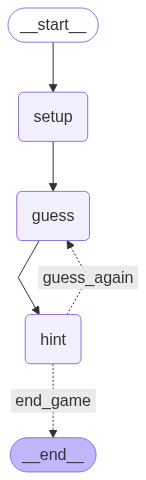

In [81]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [82]:
result = app.invoke(
    {
        "name" : "Kailash", 
        "low" : 1, 
        "high" : 20, 
        "guesses" : []
    }
)

Hi Hi Kailash, welcome! 
, I have chosen a random number 
 
Is it 13 ? 

Incorrect. Guesses left : 6, Hint: higher
Is it 18 ? 

Incorrect. Guesses left : 5, Hint: lower
Is it 14 ? 

Incorrect. Guesses left : 4, Hint: higher
Is it 16 ? 

Wow guessed in 4 attempts !, the number was 16 

